<a href="https://colab.research.google.com/github/bukvarr/laba/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22lab_work_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа

Баллы за секции:
- *Задание 1* - 10 баллов
- *Задание 2* - 20 баллов
- *Задание 3* - 30 баллов
- **Итого** - 60 баллов

Оценка за лабу $ = \frac{score}{6}$

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если **за каждое из заданий получено не менее 2 баллов**.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект - заполняете данный ноутбук, отправляете его через GitHub с указанием проверяющего.

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

***(Комментарии что курс по Python легче чем по C++ учтены)***

>**Примечание**
>
>Данные задания вдохновлены предметом "Введение в анализ данных" 2 курса, по итогу которого идёт отбор на DS-поток. Если вы видите себя в смежных областях, советуем выполнить данную лабораторку по максимуму.

In [ ]:
# Всё необходимое для выполнения данной лабораторной работы!
import requests as req
from time import sleep

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Задание 1. Парсинг - 10 баллов

В этом задании Вам предстоит работать с API сайта <a target="_blank" href="hh.ru">hh.ru</a>. Документация доступна по <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">ссылке</a>.

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, иначе вас забанят. Просрочка дедлайна по этой причине не принимается!</b>

**Задача:**
1. выбрать 5 интересующих вас профессий (не смежных, т.е. Аналатик и Data Engineer не считается корректным)
2. затем получить доступные по данным профессиям вакансии в Москве и выделить их физические координаты
3. нанести полученные координаты на карту местоположения компаний

*Пример запроса для профессии:*

In [ ]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Физик-ядерщик",
    'area': 1,
    'page': 0,
    'per_page': 10
}

data = requests.get(URL, params).json()

NameError: ignored

Если Ваш запрос прошел успешно, то вы получите следующие ключи (значения данных ключей вы найдете по ссылке на документацию):

In [ ]:
data.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

>**Примечание**
>
>В `data['pages']` будет хранится количество найденных страниц вакансий - для корректного сбора данных Вам нужно пробежать по **КАЖДОЙ** странице и сделать соотвествующие запросы.

>**Совет**
>
>Посмотрите что хранится в `items`!

(1 балл) Выберете для нас 5 наиболее интересных специальностей и получите по ним имеющиеся вакансии:

In [ ]:
URL = 'https://api.hh.ru/vacancies'

proffesions = ['Клоун', 'Связист', 'Официант', 'Продавец-консультант', 'Личный водитель']
data = list()

for job in proffesions:
  param = {'text' : job, 'area' : 1}
  sleep(1)
  data.append(req.get(URL, param).json())

(1 балл) Посчитайте сколько всего найдено вакансий:

In [ ]:
vacs = list(d['found'] for d in data)
num = 0
for v in vacs:
  num += v
num

11440

(1 балл) Создайте структуру данных, которая будет хранить в себе имя компании и ее координаты (широта и долгота):

In [ ]:
class Company:

    def __init__(self, name, lat, lng):
      self.name = name
      self.lat = lat
      self.lng = lng


(1 балл) Создайте экземпляр этой структуры данных для каждой компании, которая выставила вакансию:

In [ ]:
companies = list()
for d in data:
  for i in d['items']:
    if i['address'] != None and i['address']['lng'] != None and i['address']['lat'] != None:
      companies.append(Company(i['employer']['name'], i['address']['lat'], i['address']['lng']))
    else:
      companies.append(Company(i['employer']['name'], -1, -1))

(1 балл) Найдите количество вакансий, у которых заданы координаты (значения данных может быть пустым):

In [ ]:
num = 0
for d in data:
  for i in d['items']:
    if i['address'] != None and i['address']['lng'] != None and i['address']['lat'] != None:
      num += 1
num

35

(1 балл) Отберите вакансии, которые расположены в пределах МКАД (можно грубо):

In [ ]:
center = (55.75222, 37.61556)

rand_point = (55.9067424, 37.544117480)

def dist(a, b):
  return ((a[0] - b[0])**2 + (a[1] - b[1])**2)

def in_mrr(comp):
  return comp.lat != -1 and comp.lng != -1 and dist((comp.lat, comp.lng), center) < dist(rand_point, center)

mrr = list(filter(in_mrr, companies))

(1 балл) Постройте график в координатах "широта-долгота" для отображения вакансий внутри МКАД (не забывайте прописать прозрачность, чтобы увидеть скопления):

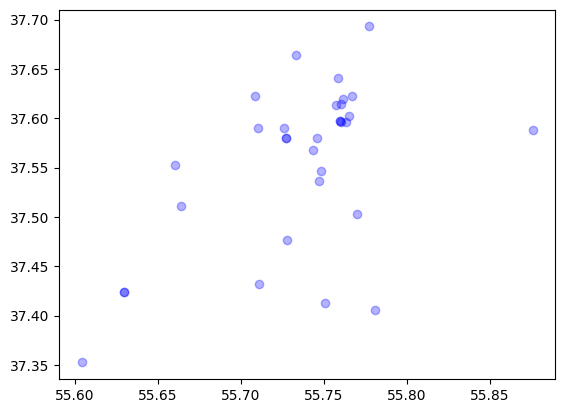

In [ ]:
#def filt(x):
 # return x != -1

lat = list()
lng = list()
name = list()
for comp in companies:
  if comp.lat != -1 and comp.lng != -1:
    lat.append(comp.lat)
    lng.append(comp.lng)
    name.append(comp.name)
plt.plot(lat, lng, 'bo', alpha=0.3)
plt.show()

(1 балл) Нанесите все точки вакансий на карту (для этого вам поможет данная <a target="_blank" href="https://plotly.com/python/mapbox-layers/">документации</a>, не забудьте про прозрачность и центрирование по Москве): 

In [ ]:
comps = pd.DataFrame({"lat" : lat, "lng" : lng, "name" : name})
map = px.scatter_mapbox(comps, lat="lat", lon="lng", hover_name="name", zoom = 10, height=400, width=400)
map.update_layout(mapbox_style="open-street-map")
map.update_layout(margin={"r":0, "t":0, "l":0, "b":0})
map.show()

(2 балла) **Сделайте выводы о проделанной работе:**

>*Подсказки для маленьких: Что вы можете сказать про районы Москвы? Что вы можете сказать про зарплаты? Что вы можете сказать про спрос?*

Ваши выводы здесь :)

Видно, что в основном клоуны, связисты, официанты, водители, продавцы требуются в центральном и западном округах МСК
Связисты в МСК вообще не в почете, в отличие от официантов,

## Задание 2. Анализ данных - 20 баллов

Вам предстоит проанализировать датасет, содержащий информацию об бриллианта, их стоимости и остальных характеристиках.



Поясним значения хранящиеся в колонках:
*   `cut` - огранка бриллианта (относится к одной из примерно 10 наиболее распространенных)
*   `color` - цвет бриллианта, прозрачные бриллианты имеют градацию `D-Z`, "более высокие" буквы - более желтоватые, но часто имеют лучшие значения, поскольку цвет трудно определить один раз в кольце
*   `clarity` - чистота бриллианта, наличие включений (внутренних дефектов), чем меньше и мельче, тем лучше
*   `carat_weight` - масса бриллианта (слабо связана с размером бриллианта, т.к. огранка и качество огранки, как правило, играют большую роль)
*   `cut_quality` - качество ограники по системе оценки GIA Cut
*   `lab` - лаборатория оценивания
*   `meas_length` - длина бриллианта
*   `meas_width` - ширина бриллианта
*   `meas_depth` - глубина бриллианта
*   `total_sales_price` - цена бриллианта в долларах.
*    **и прочие колонки**

Скачаем данные:

In [ ]:
!gdown 1uIWeZFz3ElB5p1brBVEwJBHTbjXNPdfU

Downloading...
From: https://drive.google.com/uc?id=1uIWeZFz3ElB5p1brBVEwJBHTbjXNPdfU
To: /content/diamonds.csv
100% 35.4M/35.4M [00:00<00:00, 153MB/s]


Создадим DataFrame:

In [ ]:
diamonds = pd.read_csv("diamonds.csv")

(0.5 балла) Выведете первые 5 строк датасета:

In [ ]:
diamonds[0:5]

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,None,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,None,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,None,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200


(0.5 балла) Найдите количество бриллиантов всего в данном датасете:

In [ ]:
diamonds.count()[0]

219703

(0.5 балла) Выведите максимальную и минимальную цену бриллианта в формате `номер - цена`:

In [ ]:
max_i = 0
min_i = 0
for i in range(len(diamonds['total_sales_price'])):
  if diamonds['total_sales_price'][i] > diamonds['total_sales_price'][max_i]:
    max_i = i
for i in range(len(diamonds['total_sales_price'])):
  if diamonds['total_sales_price'][i] < diamonds['total_sales_price'][min_i]:
    min_i = i

print(max_i, '-', diamonds['total_sales_price'][max_i])
print(min_i, '-', diamonds['total_sales_price'][min_i])

219702 - 1449881
0 - 200


(1 балл) Посчитайте количество пропусков (пропуском считается значение `unknown` или `None`):

In [ ]:
num = 0
for i in diamonds.values:
  for j in i:
    if j == 'None' or j == 'unknown':
      num += 1
num

1891168

(1 балл) Найдите в каких столбцах присутствуют пропуски:

In [ ]:
columns = list()
for column in diamonds.items():
  for i in diamonds[column[0]]:
    if i == 'None' or i == 'unknown':
      columns.append(column[0])
      break
for column in columns:
  print(column)

color
cut_quality
eye_clean
culet_size
culet_condition
girdle_min
girdle_max
fluor_color
fluor_intensity
fancy_color_dominant_color
fancy_color_secondary_color
fancy_color_overtone
fancy_color_intensity


В нашем датасете присутствуют колонки, которые начинаются с `fancy_color_` или `fluor_`. Большинство значений в этих колонках - `unknown` или `None`, поэтому мы считаем их малоинформативными. 

Ваша задача:

1. (0.5 балла) найти количество таких колонок, которые начинаются с `fancy_color_` или `fluor_`:

In [ ]:
columns2 = list()
for column in diamonds.items():
  if column[0].startswith('fancy_color_') or column[0].startswith('fluor_'):
    columns2.append(column[0])

len(columns2)

6

2. (0.5 балла) найти количество информативных (не `None` или `unknown`) значений в этих колонках: 

In [ ]:
num = 0
for column in diamonds.items():
  for i in columns2:
    if i != 'None' and i != 'unknown':
      num += 1

num

156

3. (0.5 балла) удалить данные колонки из датасета, сохранив изменения (в дальнейшем работаем измененным датасетом):

In [ ]:
diamonds.drop(columns = columns2, axis = 1, inplace=True)

(1 балл) Проделайте тоже самое для колонок, начинающихся с `culet_`:

In [ ]:
columns2 = list()

for columns in diamonds.items():
  if column[0].startswith('culet_'):
    columns2.append(column[0])

diamonds.drop(columns = columns2, axis = 1, inplace=True)

(1 балл) Посчитайте сколько бы стоил (в тысячах долларов) сейф, в котором хранились бы все бриллианты из датасета:

In [ ]:
sum = 0
for i in diamonds['total_sales_price']:
  sum += i
sum / 1000

1517721.991

Немного необоснованных манипуляций.

(1 балл) Выберите из датасета строки с четными индексами и выведете значения (не меняя нумерацию индексов):

In [ ]:
diamonds[::2]

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,culet_condition,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,N,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,N,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,unknown,Abraded,64.0,57.0,2.85,2.88,1.84,STK,STK,200
8,8,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,N,unknown,63.5,59.5,2.89,2.92,1.85,STK,TK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219694,219695,Round,D,IF,12.52,Excellent,HRD,Excellent,Excellent,unknown,unknown,unknown,62.1,58.0,14.84,14.91,9.24,unknown,unknown,1121792
219696,219697,Oval,H,VS2,18.88,unknown,GIA,Excellent,Excellent,unknown,N,unknown,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,N,unknown,61.3,58.0,14.06,14.18,8.66,M,STK,1210692
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,N,unknown,60.2,59.0,17.06,17.10,10.20,TN,M,1315496


(0.5 балла) А теперь с индексами, кратными 6:

In [ ]:
diamonds[::6]

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,culet_condition,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,N,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,unknown,Abraded,64.0,57.0,2.85,2.88,1.84,STK,STK,200
12,12,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,N,unknown,61.8,58.5,2.85,2.89,1.77,STK,TK,200
18,18,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,N,unknown,61.0,60.0,2.91,2.92,1.78,M,M,200
24,24,Round,L,I1,0.34,Excellent,IGI,Excellent,Excellent,unknown,unknown,unknown,0.0,0.0,0.00,0.00,0.00,unknown,unknown,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219678,219679,Round,G,VS1,10.23,Excellent,GIA,Excellent,Excellent,unknown,N,unknown,62.7,55.0,13.82,13.92,8.69,TN,M,859320
219684,219685,Radiant,unknown,I1,0.89,unknown,GIA,Good,Good,unknown,N,unknown,63.8,57.0,6.44,4.96,3.16,TK,VTK,982560
219690,219691,Round,D,VVS2,10.10,Excellent,GIA,Excellent,Excellent,unknown,N,unknown,59.4,59.0,14.07,14.15,8.39,M,STK,1040739
219696,219697,Oval,H,VS2,18.88,unknown,GIA,Excellent,Excellent,unknown,N,unknown,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347


(1 балл) Выберете из датасета только категорильные признаки и выведете датасет:

In [ ]:
diamonds[['cut', 'color', 'clarity', 'cut_quality']]

,cut,color,clarity,cut_quality
0,Round,E,VVS2,Excellent
1,Round,E,VVS2,Very Good
2,Round,E,VVS2,Excellent
3,Round,E,VVS2,Excellent
4,Round,E,VVS2,Very Good
...,...,...,...,...
219698,Round,E,VS1,Excellent
219699,Radiant,unknown,VS2,unknown
219700,Round,E,VS1,Excellent
219701,Princess,unknown,SI2,unknown


>**Примечание**
>
>Данный датасет можно использовать для задания 3 (с использованием `sklearn`)

(0.5 балла) Выберете столбец с данными о цене бриллиантов и домножите его на тот столбец, только транспонированный, и выведите полученную матрицу:

In [ ]:
column = list(diamonds['total_sales_price'])
n = len(column)

for i in range(25): #n
  for j in range(25): #n
    print(column[i] * column[j], end=' ')
  print()

40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40400 40800 
40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40400 40800 
40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40400 40800 
40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40400 40800 
40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40400 40800 
40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40400 40800 
40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 40000 4000

### Построение графиков

**Требования к графику:**

1.   График должен быть подписан
2.   Оси должны быть подписаны
3.   Должна быть легенда графика
4.   График должен быть информативным (желательно без сильных выбросов)

**Все надписи на русском языке!**

>**Примечание**
>
>График необходимо строить для очищенных данных - в них не должно быть пропусков по осям, по которым строите график. При этом **не перезатирайте** имеющийся датафрейм!

(2 балла) Постройте график `цвет бриллианта - стоимость`:

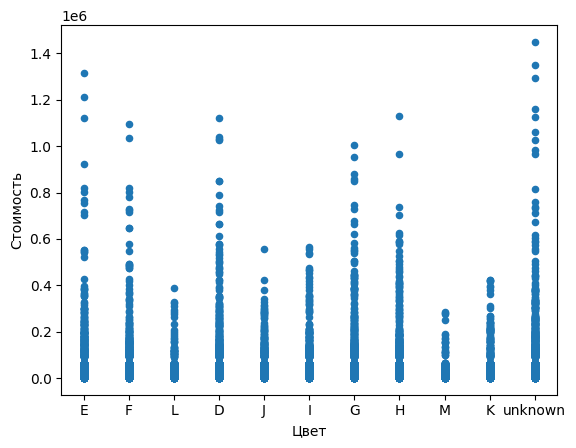

In [ ]:
diamonds2 = pd.read_csv("diamonds.csv")

cp = diamonds2[['color', 'total_sales_price']]
cpn = cp.set_axis(['Цвет', 'Стоимость'], axis = 'columns')
chart = cpn.plot.scatter(x='Цвет', y='Стоимость', alpha = 1)

(2 балла) Постройте график `лабараторная оценка - кол-во бриллиантов`:

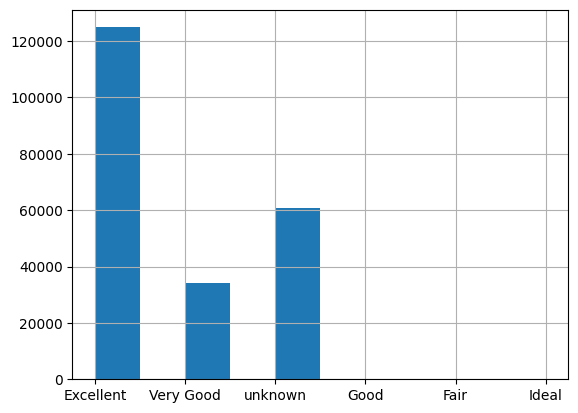

In [ ]:
table = diamonds2['cut_quality']
chart = table.hist()

(2 балла) Постройте график `вес бриллианта - стоимость`:

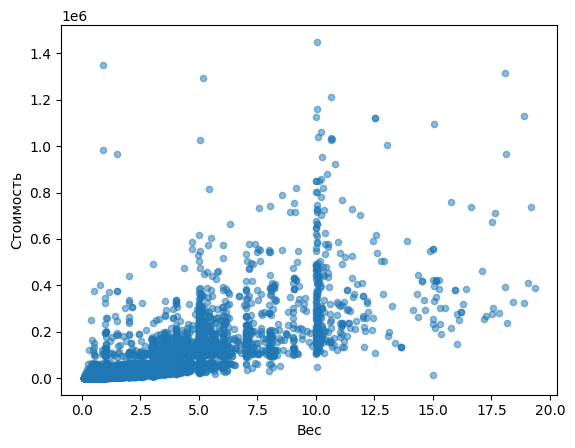

In [ ]:
wp = diamonds2[['carat_weight', 'total_sales_price']]
wpn = wp.set_axis(['Вес', 'Стоимость'], axis = 'columns')
chart = wpn.plot.scatter(x='Вес', y='Стоимость', alpha = 0.5)

(2 балла) Постройте график `система оценки GIA Cut - кол-во бриллиантов`:

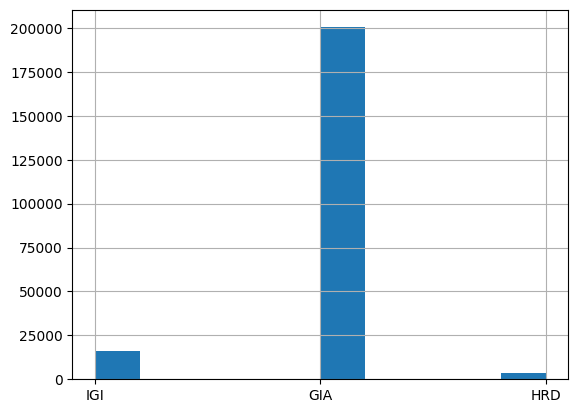

In [ ]:
t = diamonds2['lab']
chart = table.hist()

(2 балла) **Сделайте выводы по построенным графикам:**

>*Подсказка для маленьких: Что вы можете сказать о графиках полученных выше для данного датасета?*

Можно заметить, что цвет самых дорогих бриллиатнов неизвестен, а из известных самый дорогой имеет цвет E. Большинство бриллиантов имеют оценку Excellent, а оценку чаще проводилась в лаборатории GIA. Видно, что зависимость стоимости от веса почти линейная
---



---



---



---



## Задание 3. Модель - 30 баллов

В данном задании вам предстоит построить классифицирующую модель размер алмаза и его стоимости, а затем оценить полученную модель.

>**Примечание**
>
>Данная модель не претендует на самый верный индикатор стоимости алмаза, ведь мы не учитываем ничего больше чем стоимость алмаза. Исключительно для образовательных целей :)

Для построения модели нам понадобится 4 столбца, а именно: 
- `meas_length`
- `meas_width`
- `meas_depth`
- `total_sales_price`

От остальных столбцов можно избавиться.

(1 балл) Создайте новый датасет и выведите его первые 10 строк: 

In [252]:
diamonds3 = diamonds2[['meas_length', 'meas_width', 'meas_depth', 'total_sales_price']]
diamonds3[0:3]

,meas_length,meas_width,meas_depth,total_sales_price
0,2.85,2.87,1.79,200
1,2.84,2.89,1.78,200
2,2.88,2.90,1.77,200


(1 балл) Перемешайте строки в датафрейме случайным образом: 

In [277]:
diamonds3 = diamonds3.sample(len(diamonds3)).reset_index(drop=True)
diamonds3

,meas_length,meas_width,meas_depth,total_sales_price,mink_sum
0,4.77,4.78,2.96,1654,2.286774
1,5.09,5.12,3.19,2246,2.412898
2,6.29,5.93,4.14,6252,2.505076
3,4.42,4.44,2.75,804,2.116743
4,4.96,4.99,3.21,2486,2.223923
...,...,...,...,...,...
219698,6.30,3.50,2.27,680,4.469150
219699,4.28,4.31,2.64,952,2.085343
219700,4.74,4.77,2.96,1328,2.261718
219701,4.61,4.60,3.35,2270,1.581226


(1 балл) Сформируем новую колонку - для каждого бриллианта найдем сумму Минковского (p=3) по 3 измерениям бриллианта:

In [259]:
mink_sum = list()
for i in range(len(diamonds3)):
  l = diamonds3['meas_length'][i]
  w = diamonds3['meas_width'][i]
  d = diamonds3['meas_depth'][i]
  ms = (abs(l - w)**3 + abs(w - d)**3 + abs(d - l)**3)**(1/3)
  mink_sum.append(ms)
diamonds3['mink_sum'] = mink_sum
diamonds3['mink_sum']

0         2.198727
1         2.173530
2         2.104144
3         3.679144
4         0.000000
            ...   
219698    1.564974
219699    2.469510
219700    1.997156
219701    2.211325
219702    2.683691
Name: mink_sum, Length: 219703, dtype: float64

(1 балл) Сформируем новый датасет из двух колонок - сумма Минковского и `total_sales_price`: 

In [280]:
nds = diamonds3[['mink_sum', 'total_sales_price']]
nds

,mink_sum,total_sales_price
0,2.286774,1654
1,2.412898,2246
2,2.505076,6252
3,2.116743,804
4,2.223923,2486
...,...,...
219698,4.469150,680
219699,2.085343,952
219700,2.261718,1328
219701,1.581226,2270


(1 балл) Разделите вашу выборку на две части в соотношении 8:2 - одна выборка будет для тренировка, а другая для тестов вашей модели:

In [279]:
l = len(diamonds3)
train = nds.iloc [:l//5]
test = nds.iloc [l//5:]

test

,mink_sum,total_sales_price
43940,2.047548,822
43941,2.438361,3316
43942,1.946764,1100
43943,2.677467,4114
43944,5.268126,10523
...,...,...
219698,1.564974,1908
219699,2.469510,2542
219700,1.997156,1098
219701,2.211325,564


(2 балла) Постройте график зависимости стоимости от вашего нового параметра размера для тренинг-выборки:

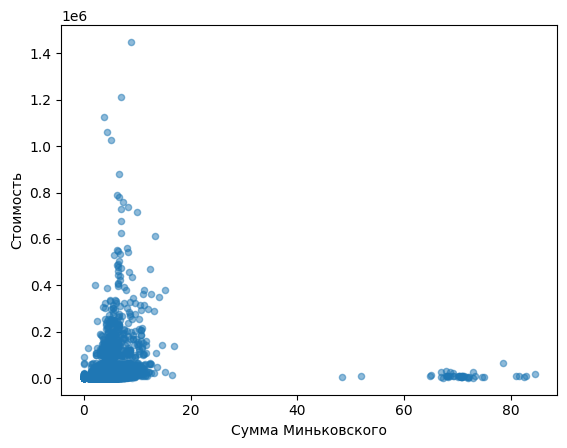

In [265]:
trn = train.set_axis(['Сумма Миньковского','Стоимость'], axis='columns')
chart = trn.plot.scatter(x='Сумма Миньковского', y='Стоимость', alpha = 0.5)

(2 балла) Нанесите на тот же график тестовую выборку, используя другой цвет (не забудьте про параметр прозрачности):

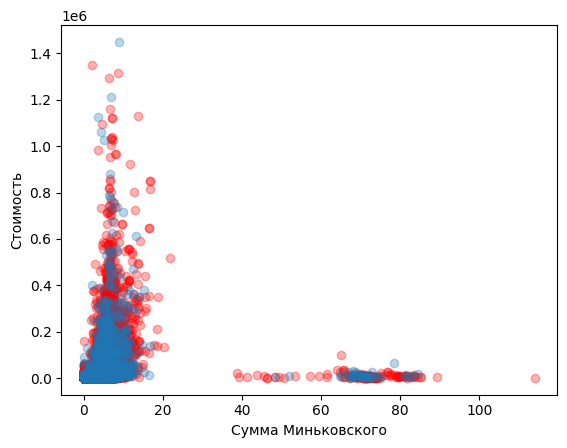

In [269]:
plt.xlabel('Сумма Миньковского')
plt.ylabel('Стоимость')
plt.scatter(x=test['mink_sum'], y=test['total_sales_price'], c='red', alpha = 0.3)
plt.scatter(x=train['mink_sum'], y=train['total_sales_price'], alpha = 0.3)

(3 балла) Найдите для каждой бриллианта из тестовой выборки его "ближайшего соседа" из тренинг-выборки. Для каждого бриллианта из тестовой выборки найдите расстояния до соответствующего ближайшего соседа:

In [ ]:
# your code here

(3 балла) Найдите насколько сильно (в процентах) отличается цена бриллиантов из тестовой выборки от их соответствующих ближайших соседей:

In [ ]:
# your code here

**Данная модель является выдумкой автора. Не важен коэффициент ошибки, важны ваши шаги для получения коэффициента.**

### Введение в машинное обучение

Теперь давайте познакомимся с таким сильным инструментом как `sklearn`.

Вам необходимо:
1. выбрать 2 категориальных признака
2. на их основе обучить решающее дерево
3. оценить среднеквадратичную ошибку цены бриллианта
4. сделать пп. 1-3 и выбрать ту пару, которая дает лучший результат
5. сделать выводы

(3 балла) Мы работаем с категориальными признаками, для них не понятно что есть "больше" и "меньше". Поэтому нам нужно предварительно закодировать значения наших признаков, с чем нам поможет [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html):

In [271]:
import sklearn.preprocessing as slp

ds = diamonds2[['color', 'clarity']]
encoder = slp.OneHotEncoder(handle_unknown='ignore')
encoder.fit(ds)
ds = encoder.transform(ds).toarray()

array([[0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

(3 балла) Разбейте датасет на обучающую и тестовую выбору. Для этого вам поможет [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html):

In [281]:
import sklearn.model_selection as slm
xtr, xt, ytr, yt = slm.train_test_split(ds, list(diamonds2['total_sales_price']), train_size = 0.8)
xtr

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

(3 балла) Затем создайте и обучите вашу модель - [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html):

(3 балла) Оцените ошибку вашей модели при помощи [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html):

In [ ]:
# your code here

(3 балла) **Сделайте выводы какие категориальные признаки лучше:**

*Подсказки для маленьких: Что вы можете сказать о зависимости по вашей выборке признаков? Какой вы можете сделать вывод об готовых инструментах для работы и написанных Вами?*

Ваши выводы здесь :)